<a href="https://colab.research.google.com/github/Rochakr4/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
#importing essential datasets
import numpy as np#For array operations
import pandas as pd#For dataframe operation
import datetime as dt#For datetime
import matplotlib.pyplot as plt#For visualisation
import seaborn as sns#For visualisation
import plotly.express as px#For visualisation
from pylab import rcParams#For visualisation
import matplotlib.cm as cm#For visualisation

from sklearn.cluster import KMeans#For Kmeans clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering#For Hierarchical clustering
from sklearn.cluster import DBSCAN#Importing DBSCAN

from sklearn.preprocessing import StandardScaler#For scalling operation
from sklearn.datasets import make_blobs
from sklearn import metrics#For Scoring operations
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.2 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=2ea59693ef142743eefbbee25ad0bcc97a73e375a130062e8c0374ec51b42307
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [3]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#reading file
df=pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT 4-Online Retail Customer Segmentation /Online Retail.csv')

In [5]:
df.head()#How does the dataset look like...?

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [6]:
df.info()#Checking Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()#Checking describe

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The dataset contains two numerical deatures and six categorical features.

# Data Prepping

##NaN value handling

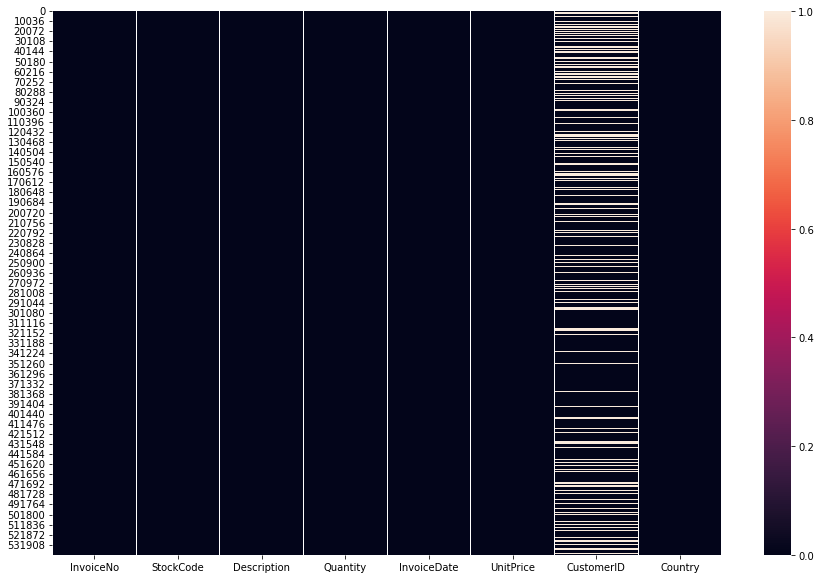

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())#Checking NaN values in dataset using heatmap visualisation

A lot of Nan values are found in the 'CustomerID' feature, which in turn is a unique identifier. So, implementing imputation techniques doesn’t make sense.

In [9]:
df.dropna(inplace=True)# dropping Nan value rows

For further better analysis iam creating date-related features such as ‘month’, ‘day’, ‘year’ etc.

In [10]:
#Removing the time from invoice date, since it's not in proper format. This will enable us to convert string type to datetime object
df['InvoiceDate']=df['InvoiceDate'].apply(lambda x: x[:][:-5])
#convering to datetime object
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
#creating month year and day features
df['Month']=df['InvoiceDate'].dt.month
df['Day']=df['InvoiceDate'].dt.day
df['Day_Name']=df['InvoiceDate'].dt.day_name()
df['Year']=df['InvoiceDate'].dt.year

After necessary feature alteration let's check how the dataset looklike

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Day_Name,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,1,12,Tuesday,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,1,12,Tuesday,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,1,12,Tuesday,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,1,12,Tuesday,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,1,12,Tuesday,2010


# EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

## InvoiceNo

As given in data discription ,Invoice number is a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

In [12]:
df[df['InvoiceNo'].str.contains('C')]#Checking for cancelled invoices

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Day_Name,Year
141,C536379,D,Discount,-1,2010-01-12,27.50,14527.0,United Kingdom,1,12,Tuesday,2010
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-01-12,4.65,15311.0,United Kingdom,1,12,Tuesday,2010
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-01-12,1.65,17548.0,United Kingdom,1,12,Tuesday,2010
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-01-12,0.29,17548.0,United Kingdom,1,12,Tuesday,2010
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-01-12,0.29,17548.0,United Kingdom,1,12,Tuesday,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-09-12,0.83,14397.0,United Kingdom,9,12,Monday,2011
541541,C581499,M,Manual,-1,2011-09-12,224.69,15498.0,United Kingdom,9,12,Monday,2011
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-09-12,10.95,15311.0,United Kingdom,9,12,Monday,2011
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-09-12,1.25,17315.0,United Kingdom,9,12,Monday,2011


There are 8,905 cancellation entries in the dataset.

For better analysis I am dropping all the canceled invoice rows because there are chances that it may act as noise or bias.

Here I am not going to remove all the transactions related to the cancellation because the customer had an urge or intention of purchasing.

In [13]:
df=df[~df['InvoiceNo'].str.contains('C')]#Dropping the canceled row entries

## Description

In [14]:
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)#Checking for items and the corresponding quantities sold.

Description
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS      54415
JUMBO BAG RED RETROSPOT                46181
WHITE HANGING HEART T-LIGHT HOLDER     36725
                                       ...  
BLACK VINT ART DEC CRYSTAL BRACELET        1
FLOWER SHOP DESIGN MUG                     1
SET 36 COLOURING PENCILS DOILEY            1
HEN HOUSE W CHICK IN NEST                  1
AMBER BERTIE GLASS BEAD BAG CHARM          1
Name: Quantity, Length: 3877, dtype: int64

There are 3877 items sold from 01/12/2010 to 09/12/2011.

## UnitPrice

,Quantity,UnitPrice
Description,,
POSTAGE,3120,8142.750
Manual,7179,4161.060
DOTCOM POSTAGE,16,1599.260
PICNIC BASKET WICKER 60 PIECES,61,649.500
VINTAGE BLUE KITCHEN CABINET,26,295.000
...,...,...
POPART WOODEN PENCILS ASST,8900,0.120
FOLDING CAMPING SCISSOR W/KNIF & S,30,0.120
PORCELAIN BUDAH INCENSE HOLDER,1501,0.100


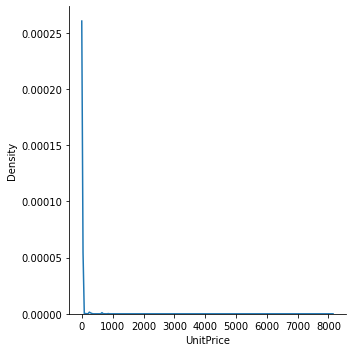

In [15]:
#Checking item wise unit price(top 5 and last 5)
display(pd.concat([df.groupby('Description')['Quantity'].sum(), df.groupby('Description')['UnitPrice'].max()], axis=1).sort_values(by='UnitPrice',ascending=False))

sns.displot(data=(df['UnitPrice']), kind="kde")#Checking unit price distribution


The unit price is ranging from 0.001 to 8142.75.

High positive skewness is observed, Unit price of 75% of items sold is less than 4.

## Total sales

For better understanding and analysis a new feature is introduced i.e., 'Total sales' which is the arrived by multiplying quantity and unit price

In [16]:
df['Total_Sales']=df['Quantity']*df['UnitPrice']#Introducing Total sales feature

In [17]:
df.sort_values(by='Total_Sales',ascending=False).reset_index()#Checking highest and lowest sales(top 5 and last 5)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Day_Name,Year,Total_Sales
0,540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-09-12,2.08,16446.0,United Kingdom,9,12,Monday,2011,168469.60
1,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom,1,18,Tuesday,2011,77183.60
2,222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-10-06,649.50,15098.0,United Kingdom,10,6,Thursday,2011,38970.00
3,173382,551697,POST,POSTAGE,1,2011-03-05,8142.75,16029.0,United Kingdom,3,5,Saturday,2011,8142.75
4,348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20,5.06,17450.0,United Kingdom,9,20,Tuesday,2011,7144.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,279324,561284,22167,OVAL WALL MIRROR DIAMANTE,1,2011-07-26,0.00,16818.0,United Kingdom,7,26,Tuesday,2011,0.00
397920,285657,561916,M,Manual,1,2011-01-08,0.00,15581.0,United Kingdom,1,8,Saturday,2011,0.00
397921,395529,571035,M,Manual,1,2011-10-13,0.00,12446.0,RSA,10,13,Thursday,2011,0.00
397922,439361,574469,22385,JUMBO BAG SPACEBOY DESIGN,12,2011-04-11,0.00,12431.0,Australia,4,11,Monday,2011,0.00


Lets check how many items constitute percentage proportion of total sales happened over the year.

In [18]:
def check(val):#A temporary function which returns a dataframe with the no.of items to sales correlation
  temp= pd.DataFrame(columns=['No.of items', 'SALES'])
  for i in range(1,3877):
       tmp=df.groupby('Description')['Total_Sales'].sum().sort_values(ascending=False).head(i).reset_index()['Total_Sales'].sum()/df['Total_Sales'].sum()
       temp=temp.append({'No.of items': round(i*100/3877,2),
                            'SALES' : round(tmp*100,2)},
                         ignore_index = True)
  return temp

In [19]:
temp=check(1)#Implementing same

In [20]:
px.line(temp,x="No.of items",y="SALES",title='Number of items to sales contribution')#Visualising the above dataframe

Top 61 items i.e., 1.57% of total items for sale constitute 25.12% of total sales

Top 237 items i.e., 6.11% of total items for sale constitute 50.04% of total sales

Top 658 items i.e., 16.97% of total items for sale constitute 75.02% of total sales

Top 1306 items i.e., 33.69% of total items for sale constitute 90.0% of total sales

## Customer ID

In [21]:
def check(val):#A temporary function which returns a dataframe with the no.of customers to sales correlation
  temp= pd.DataFrame(columns=['CUSTOMERS', 'SALES'])
  for i in range(1,4339):
       tmp=df.groupby('CustomerID')['Total_Sales'].sum().sort_values(ascending=False).head(i).reset_index()['Total_Sales'].sum()/df['Total_Sales'].sum()
       temp=temp.append({'CUSTOMERS': round(i*100/4339,2),
                            'SALES' : round(tmp*100,2)},
                         ignore_index = True)
  return temp

In [22]:
temp=check(1)#Implementing same

In [23]:
#Visualising the above dataframe
px.line(temp,x="CUSTOMERS",y="SALES",title='Number of Customers to sales contribution')

Top 23 customers i.e., 0.53% of total customers constitute 25.29% of total sales

Top 212 customers i.e., 4.89% of total customers constitute 50.05% of total sales

Top 885 customers i.e., 20.4% of total customers constitute 75.01% of total sales

Top 1908 customers i.e., 43.97% of total customers constitute 90.0% of total sales

## Country

In [24]:
#Analysing countries w.r.t total sales and sales to no. of customer ratio
temp_df=pd.concat([df.groupby('Country')['CustomerID'].count(), df.groupby('Country')['Total_Sales'].sum()], axis=1).rename(columns = {'CustomerID':'No. of customers'})#A temporary dataframe
temp_df['Total sales to customer ratio']=temp_df['Total_Sales']/temp_df['No. of customers']#sales to no. of customer ratio

In [25]:
#Creating bar graph from above dataframe
px.bar(data_frame=temp_df.sort_values(by='Total sales to customer ratio',ascending=False).reset_index(),
                  width=1000,height=800,
                  x='Total sales to customer ratio',y='Country',
                  hover_data=['No. of customers'],color='Total_Sales',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='Analysing countries w.r.t total sales and sales to no. of customer ratio')

United kingdom has highest sales and customers.

While considering sales to no of customers, Netherlands, Australia and Japan are at the top

## Month

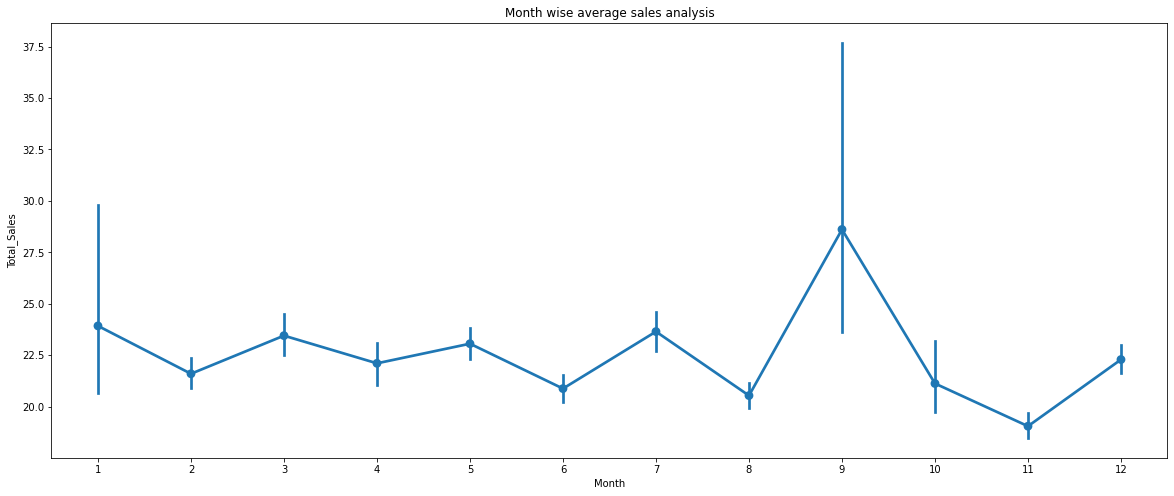

In [26]:
#Month wise average sales analysis
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Month',y='Total_Sales')
ax.set(title='Month wise average sales analysis')
#Month wise total sales
temp_bar=px.bar(data_frame=pd.concat([df.groupby('Month')['CustomerID'].count(), df.groupby('Month')['Total_Sales'].sum()], axis=1).rename(columns = {'CustomerID':'No. of customers'}).reset_index(),
                y=['Total_Sales','No. of customers'],x='Month',title='Month wise total sales and no. of customer visit')
temp_bar.show()

September month had the highest sales as well as highest average sales.

November month had the highest number of customers



## Day name

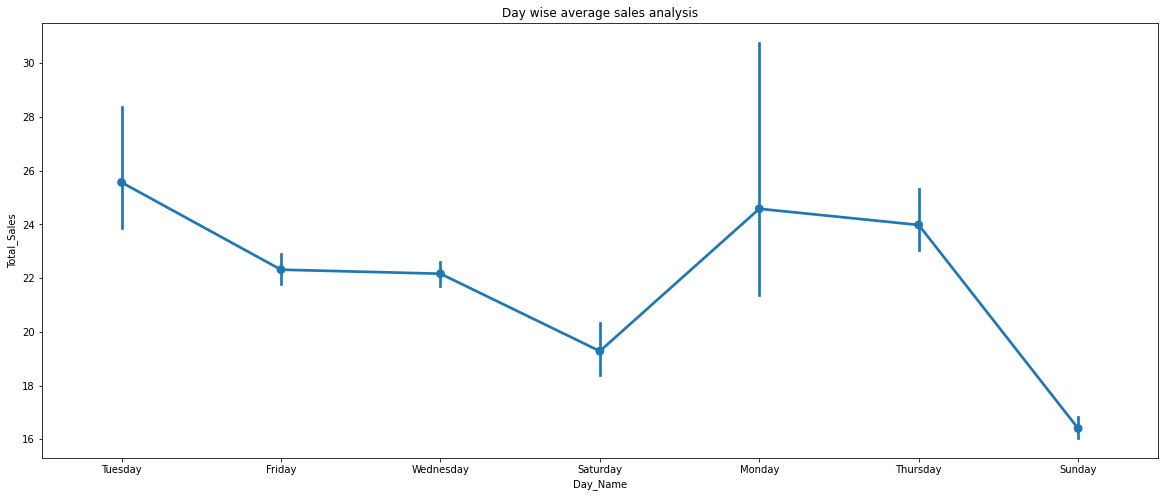

In [27]:
#Day wise average sales analysis
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Day_Name',y='Total_Sales')
ax.set(title='Day wise average sales analysis')
#Day wise total sales
temp_bar=px.bar(data_frame=pd.concat([df.groupby('Day_Name')['CustomerID'].count(),
                                      df.groupby('Day_Name')['Total_Sales'].sum()], axis=1).rename(columns = {'CustomerID':'No. of customers'}).reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index(),
                y=['Total_Sales','No. of customers'],
                x='Day_Name',
                title='Day wise total sales and no. of customer visit')
temp_bar.show()

Monday, tuesday and thursday had the highest sales as well as highest average sales.

# Clustering Analysis

## RFM Analysis

**RFM  (recency,  frequency  and  monetary)**  model  is  a behavior-based model used to analyze the behavior of a customer and then    make    predictions   based on the behavior in the database . 

Moreover, **recency** represents the length of a time period since  the  last  purchase,  

while  **frequency**  denotes  the number  of  purchase  within  a  specified time  period .

For **monetary**  , customers are coded by the total amount of money spent during  a  specified  period  of  time.  The  definition  of monetary is defined by the money value that the customer spent in this time period or by the average money amount per  purchase  or  all  purchases  to  date .  

In fact,  these  three variables belong  to  the behavioral  variables and  can  be used as the segmenting variables by observing customer's attitudes toward the product, brand, benefit or even loyalty from the database.

SOURCE:[A review of the application of RFM model](https://www.researchgate.net/publication/228399859_A_review_of_the_application_of_RFM_model)

In this analysis, Monetary feature is the average amount per purchase

* It  is better  to  use  the average  purchase amount  rather  than  the  total  accumulated  purchase amount  so  as  to  reduce  co-linearity  of  frequency  and monetary

In [28]:
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days,
                                       'InvoiceNo': lambda x: len(x), 
                                       'Total_Sales': lambda x: x.mean()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Total_Sales': 'Monetary'}, inplace=True)

rfm_df['Total_amount']=rfm_df['Frequency']*rfm_df['Monetary']#Adding total amount feature as well
rfm_df.reset_index()

,CustomerID,Recency,Frequency,Monetary,Total_amount
0,12346.0,326,1,77183.600000,77183.60
1,12347.0,40,182,23.681319,4310.00
2,12348.0,76,31,57.975484,1797.24
3,12349.0,19,73,24.076027,1757.55
4,12350.0,311,17,19.670588,334.40
...,...,...,...,...,...
4334,18280.0,160,10,18.060000,180.60
4335,18281.0,4,7,11.545714,80.82
4336,18282.0,216,12,14.837500,178.05
4337,18283.0,10,756,2.771005,2094.88


Let’s check how 'Recency', 'Frequency' and 'Monetary' behave with each other

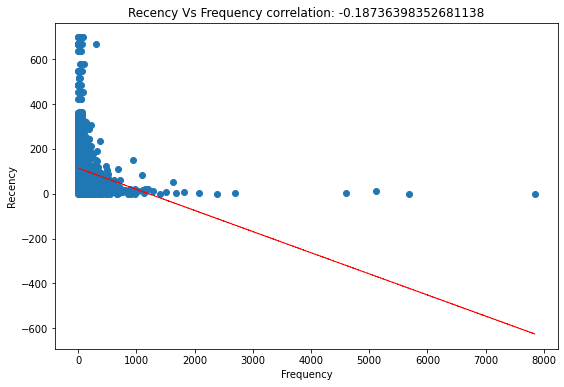

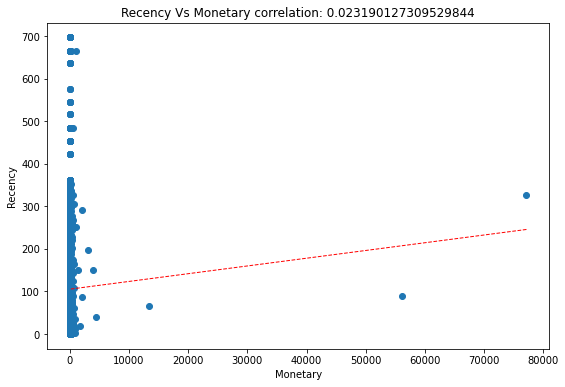

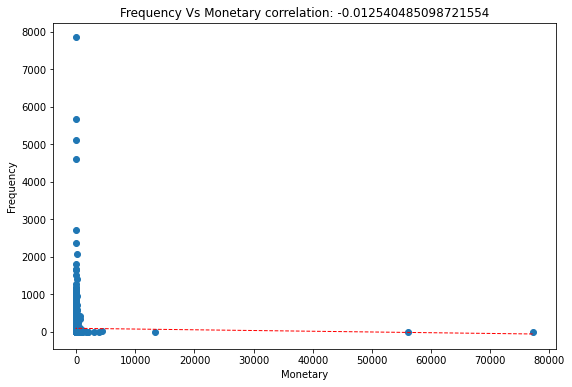

In [29]:
#ploting and calculating correlation score between 'Recency','Frequency' & 'Monetary'
temp_list=['Recency','Frequency','Monetary']
i=0
for tmp in ['Recency','Frequency','Monetary']:
   i=i+1
   for col in temp_list[i:3]:
       fig=plt.figure(figsize=(9,6))
       ax=fig.gca()
       feature=rfm_df[col]
       label=rfm_df[tmp]
       correlation=feature.corr(label)#Calculating correlation
       plt.scatter(x=feature,y=label)#Ploting data
       plt.xlabel(col)
       plt.ylabel(tmp)
       ax.set_title(tmp+' Vs '+col + ' correlation: ' + str(correlation) )
       z=np.polyfit(feature,label,1)
       y_hat=np.poly1d(z)(rfm_df[col])
       plt.plot(rfm_df[col],y_hat,"r--",lw=1)#Line plot
       plt.show()

REMARKS:

Recent customers tend to be frequent customers.



The  RFM  model  is  the  most  frequently  adopted segmentation  technique  that comprises  three  measures (recency, frequency and monetary), which  are combined into  a  three-digit  RFM  cell  code,  covering  five  equal quintile  (20%  group).

*   **For  RECENCY**,  customers  are  sorted  by purchase  dates.  Recency  is  commonly  defined  by  the number  of  periods  since  the  last  purchase,  which measures the interval between the most recent transaction time and the analyzing time (days or months), that is, the lower the number of days, the higher the score of recency. A customer having a high score of recency implies that he or she is more likely to make a repeat purchase. The top 20% segment is coded as 5, while the next 20% segment is coded as 4 and so forth. Finally, the recency    for   each customer in the database is denoted by a number from 5 to 1.
*   For  **FREQUENCY**,  the  database  is  sorted  by  purchase frequency  (the number  of purchases)  made in  a  certain time period. The definition of frequency is often simplified to  consider  two  states,  including  single  and  repeated purchases. The top quintile is assigned a value of 5 and the others are given the values of 4, 3, 2 and 1. However, higher frequency score indicates greater customer loyalty. A customer having a high score of frequency implies that he or she has great demand for the product and is more likely to purchase the products repeatedly.

*   For **MONETARY**, customers are coded by the total amount of money spent during  a  specified  period  of  time.  The  definition  of monetary is defined by the dollar value that the customer spent in this time period or by the average dollar amount per  purchase  or  all  purchases  to  date






In [30]:
#Segmenting R, F and M in buckets of 5 and assigning scores.
rfm_df['R'] =  pd.qcut(rfm_df['Recency'], 5, [5,4,3,2,1])
rfm_df['F'] =  pd.qcut(rfm_df['Frequency'], 5, [1,2,3,4,5])
rfm_df['M'] =  pd.qcut(rfm_df['Monetary'], 5, [1,2,3,4,5])
rfm_df.head()

,Recency,Frequency,Monetary,Total_amount,R,F,M
CustomerID,,,,,,,
12346.0,326,1,77183.600000,77183.60,1,1,5
12347.0,40,182,23.681319,4310.00,4,5,4
12348.0,76,31,57.975484,1797.24,3,3,5
12349.0,19,73,24.076027,1757.55,4,4,4
12350.0,311,17,19.670588,334.40,1,2,4


Finally, all customers are presented by 555, 554, 553, …, 111, which thus creates 125 (5×5×5) RFM cells. Moreover, the best customer segment is 555, whereas the worst customer segment  is 111. Based  on  the  assigned RFM  behavior  scores,  customers  can  be  grouped  into segments  and  their  profitability  can be  further analyzed

In [31]:
#creating RFM classes
rfm_df['RFM_Class']= rfm_df['R'].astype(str) + rfm_df['F'].astype(str) + rfm_df['M'].astype(str)
rfm_df=rfm_df.reset_index()
rfm_df

,CustomerID,Recency,Frequency,Monetary,Total_amount,R,F,M,RFM_Class
0,12346.0,326,1,77183.600000,77183.60,1,1,5,115
1,12347.0,40,182,23.681319,4310.00,4,5,4,454
2,12348.0,76,31,57.975484,1797.24,3,3,5,335
3,12349.0,19,73,24.076027,1757.55,4,4,4,444
4,12350.0,311,17,19.670588,334.40,1,2,4,124
...,...,...,...,...,...,...,...,...,...
4334,18280.0,160,10,18.060000,180.60,2,1,3,213
4335,18281.0,4,7,11.545714,80.82,5,1,2,512
4336,18282.0,216,12,14.837500,178.05,1,1,2,112
4337,18283.0,10,756,2.771005,2094.88,5,5,1,551


In [32]:
#bar plot of top 20 customer classes in terms of number of customers
temp_bar=px.bar(data_frame=rfm_df.groupby('RFM_Class')['CustomerID'].count().reset_index().rename(columns = {'CustomerID':'No. of customers'}).sort_values('No. of customers').tail(35),
                y=['No. of customers'],
                x='RFM_Class',
                title='Top 20 customer classes')
temp_bar.show()
#bar plot of last 20 customer classes in terms of number of customers
temp_bar=px.bar(data_frame=rfm_df.groupby('RFM_Class')['CustomerID'].count().reset_index().rename(columns = {'CustomerID':'No. of customers'}).sort_values('No. of customers').head(20),
                y=['No. of customers'],
                x='RFM_Class',
                title='Last 20 customer classes')
temp_bar.show()

REMARKS:

*   115, 551, 215, 451 and 112 are top 5 RFM classes.
*   511, 155, 154, 145 and 255 are last 5 RFM classes.



For further analysis, a new feature i.e., 'RFM_Score' which is sum or weighted sum of R, F and M scores.

In this project weighted sum is used i.e.,  RFM_Score= 3*R + 2*F + M.

Higher weightage is given to recency because the most important factor in identifying customers who are likely to respond to a new offer is recency. Customers who purchased more recently are more likely to purchase again than are customers who purchased further in the past

In [33]:
rfm_df['RFM_Score']= 3*rfm_df['R'].astype(int) + 2*rfm_df['F'].astype(int) + rfm_df['M'].astype(int)#calculating RFM score
rfm_df=rfm_df.reset_index()
rfm_df

,index,CustomerID,Recency,Frequency,Monetary,Total_amount,R,F,M,RFM_Class,RFM_Score
0,0,12346.0,326,1,77183.600000,77183.60,1,1,5,115,10
1,1,12347.0,40,182,23.681319,4310.00,4,5,4,454,26
2,2,12348.0,76,31,57.975484,1797.24,3,3,5,335,20
3,3,12349.0,19,73,24.076027,1757.55,4,4,4,444,24
4,4,12350.0,311,17,19.670588,334.40,1,2,4,124,11
...,...,...,...,...,...,...,...,...,...,...,...
4334,4334,18280.0,160,10,18.060000,180.60,2,1,3,213,11
4335,4335,18281.0,4,7,11.545714,80.82,5,1,2,512,19
4336,4336,18282.0,216,12,14.837500,178.05,1,1,2,112,7
4337,4337,18283.0,10,756,2.771005,2094.88,5,5,1,551,26


Based on RFM score calculated above customers are being classified into 5 graded groups i.e, ['C','B', 'B+', 'A', 'A+'].

In [34]:
#Classifying on basis of RFM_score to Grade 1,2,3 and 4
Customer_grade = ['Lost','At Risk','Customers Needing Attention','Promising','Potential Loyalist', 'Loyal Customers', 'Champions']
Score_cuts = pd.qcut(rfm_df.RFM_Score, q = 7, labels = Customer_grade)#spliting into 5 quantile
rfm_df['Customer_grade'] = Score_cuts.values
rfm_df=rfm_df.reset_index()
rfm_df

,level_0,index,CustomerID,Recency,Frequency,Monetary,Total_amount,R,F,M,RFM_Class,RFM_Score,Customer_grade
0,0,0,12346.0,326,1,77183.600000,77183.60,1,1,5,115,10,Lost
1,1,1,12347.0,40,182,23.681319,4310.00,4,5,4,454,26,Loyal Customers
2,2,2,12348.0,76,31,57.975484,1797.24,3,3,5,335,20,Potential Loyalist
3,3,3,12349.0,19,73,24.076027,1757.55,4,4,4,444,24,Loyal Customers
4,4,4,12350.0,311,17,19.670588,334.40,1,2,4,124,11,At Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,4334,4334,18280.0,160,10,18.060000,180.60,2,1,3,213,11,At Risk
4335,4335,4335,18281.0,4,7,11.545714,80.82,5,1,2,512,19,Promising
4336,4336,4336,18282.0,216,12,14.837500,178.05,1,1,2,112,7,Lost
4337,4337,4337,18283.0,10,756,2.771005,2094.88,5,5,1,551,26,Loyal Customers


Based on the customer grades ,customers are further classified into valuable(graded-A+), may be valuable(graded-A) and invaluable(graded-C)

In [35]:
def customer(x):#A function to categories customers into valuable(graded-A+), may be valuable(graded-A) and invaluable(graded-C)
  segment='NA'
  if x in ['A+']:
    segment='valuable'
  elif x in ['A']:
    segment='May be valuable'
  elif x in ['C']:
    segment='invaluable'
  return segment

In [36]:
#Creating 'valuable or not' column
rfm_df['valuable or not']=rfm_df['Customer_grade'].apply(customer)

In [37]:
#Pie chart visualisation of customer category percentage distribution  w.r.t total amount
target_type_piechart=px.pie(rfm_df.groupby('valuable or not')['Total_amount'].sum().reset_index(), 
          values='Total_amount',
          names='valuable or not',
          title='Customer category percentage distribution  w.r.t total amount')
target_type_piechart.show()
#Pie chart visualisation of Customer category percentage distribution w.r.t number of customers
target_type_piechart=px.pie(rfm_df.groupby('valuable or not')['CustomerID'].count().reset_index(), 
          values='CustomerID',
          names='valuable or not',
          title='Customer category percentage distribution w.r.t number of customers')
target_type_piechart.show()

REMARKS:

* 18% of customers i.e., valuable customers is responsible for 60% of total sales.

## Data Prepping

### Outlier handling

In [38]:
rfm_df_1=rfm_df.copy()#For further analysis copy of rfm_df will be used

<Figure size 648x432 with 0 Axes>

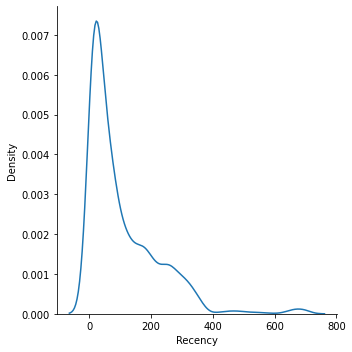

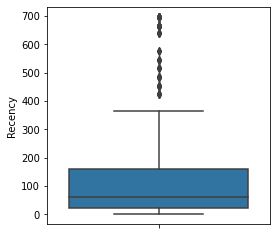

<Figure size 648x432 with 0 Axes>

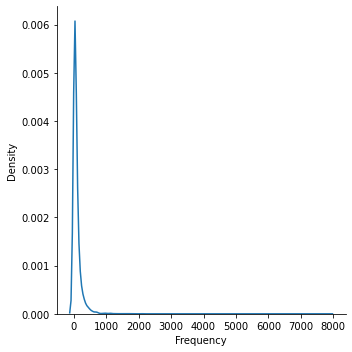

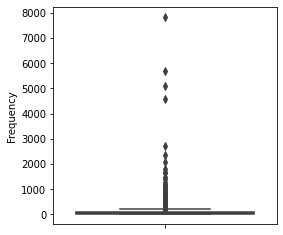

<Figure size 648x432 with 0 Axes>

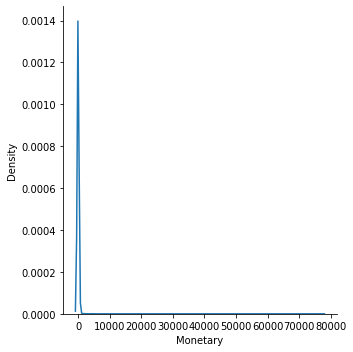

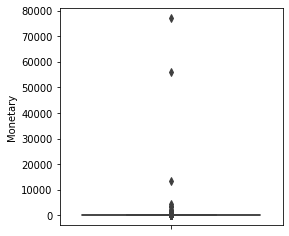

In [39]:
#lets check distribution and outliers in 'Recency','Frequency' and 'Monetary' features
for x in ['Recency','Frequency','Monetary']:
    fig = plt.figure(figsize=(9, 6))
    sns.displot(data=(rfm_df_1[x]), kind="kde")#For distribution analysis
    plt.show()
    plt.figure(figsize=(4,4))
    fig=sns.boxplot(y=(rfm_df_1[x]))#For outlier analysis
    fig.set_title('')
    fig.set_ylabel(x)
    plt.show()

Frequency and monetary features have high +ve skewness and outliers. In order to handle this, log transformation is implemented and capping if necessary.

In [40]:
#Let's check if the feature contains any zero values
rfm_df_1[(rfm_df_1['Recency']<=0) | (rfm_df_1['Frequency']<=0) | (rfm_df_1['Monetary']<=0)]

,level_0,index,CustomerID,Recency,Frequency,Monetary,Total_amount,R,F,M,RFM_Class,RFM_Score,Customer_grade,valuable or not
30,30,30,12381.0,0,87,21.210460,1845.31,5,4,4,544,27,Champions,NA
79,79,79,12444.0,0,177,28.279435,5005.46,5,5,4,554,29,Champions,NA
137,137,137,12518.0,0,124,16.587823,2056.89,5,5,3,553,28,Champions,NA
165,165,165,12553.0,0,191,19.331309,3692.28,5,5,3,553,28,Champions,NA
177,177,177,12569.0,0,188,21.939840,4124.69,5,5,4,554,29,Champions,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,4083,4083,17934.0,0,21,33.535714,704.25,5,2,5,525,24,Loyal Customers,NA
4252,4252,4252,18171.0,0,54,22.802037,1231.31,5,3,4,534,25,Loyal Customers,NA
4298,4298,4298,18229.0,0,164,44.371341,7276.90,5,5,5,555,30,Champions,NA
4332,4332,4332,18277.0,0,8,13.797500,110.38,5,1,2,512,19,Promising,NA


74 rows contain zero values, these values are converted to 1 because it will affect the log transformation.

In [41]:
#Converting zero values to one
rfm_df_1['Recency']=rfm_df_1['Recency'].apply(lambda x:1 if x<=0 else x)
rfm_df_1['Monetary']=rfm_df_1['Monetary'].apply(lambda x:1 if x<=0 else x)
rfm_df_1['Frequency']=rfm_df_1['Frequency'].apply(lambda x:1 if x<=0 else x)

<Figure size 648x432 with 0 Axes>

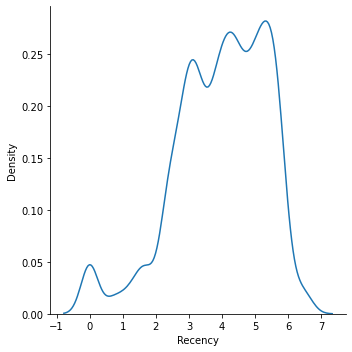

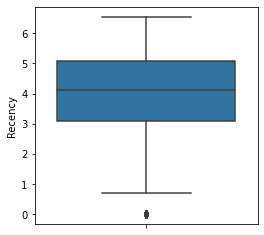

<Figure size 648x432 with 0 Axes>

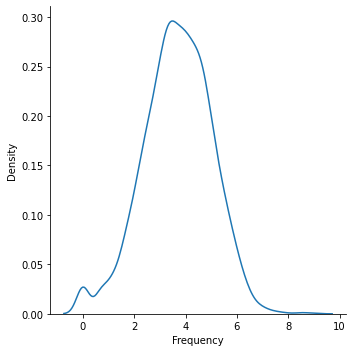

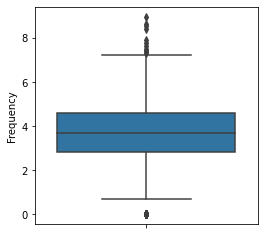

<Figure size 648x432 with 0 Axes>

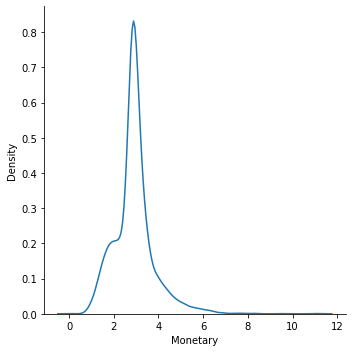

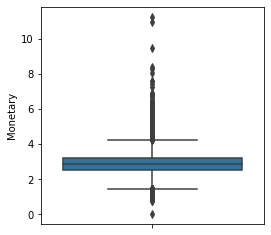

In [42]:
#let's check the distribution and outlier presence after log transformation
for x in ['Recency','Frequency','Monetary']:
    fig = plt.figure(figsize=(9, 6))
    sns.displot(data=np.log(rfm_df_1[x]), kind="kde")#distribution
    plt.show()
    plt.figure(figsize=(4,4))
    fig=sns.boxplot(y=np.log(rfm_df_1[x]))#outlier
    fig.set_title('')
    fig.set_ylabel(x)
    plt.show()

After log transformation, a good number of outliers are observed in the monetary feature. In order to reduce those, capping is implemented.

Rows with a monetary value greater than 40,000 are omitted from the dataset.


In [43]:
rfm_df_1=rfm_df_1[rfm_df_1.Monetary<40000]#Implementing the same

In [44]:
#Implementing log transformation
rfm_df_1['Recency_log']=np.log(rfm_df_1['Recency'])
rfm_df_1['Monetary_log']=np.log(rfm_df_1['Monetary'])
rfm_df_1['Frequency_log']=np.log(rfm_df_1['Frequency'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [45]:
x=rfm_df_1[['Recency_log','Frequency_log','Monetary_log']]#Initialising x for further clustering analysis

In [46]:
#Scaling data using StandardScaler() since all the features are having measure scale
scaler = StandardScaler()
#Implementing StandardScaler() on train and test data
X = scaler.fit_transform(x)

## K-Means clustering

In [47]:
sum_of_sq_dist = {}#Initialising dict variable for appending K value and corresponding sum of square distance
#Implementing K means clustering
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

Lets check the optimum value of K using elbow method

In [48]:
#Plot the graph for the sum of square distance values and Number of Clusters
px.line(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),labels={'x': 'Number of Clusters(k)','y':'Sum of Square Distances'},title='Elbow Method For Optimal k')

* Elbow method suggest 2 followed by 3 as optimum K values

Lets check the optimum value of K using silhouette analysis

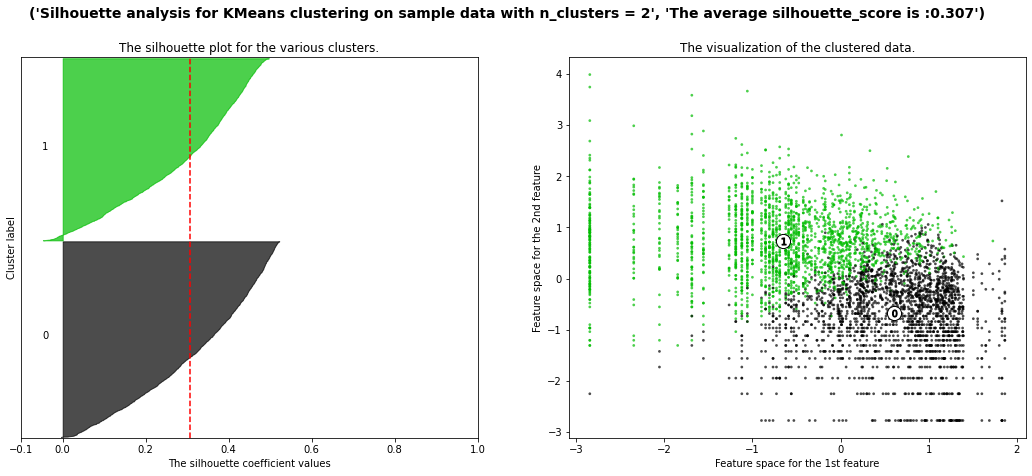

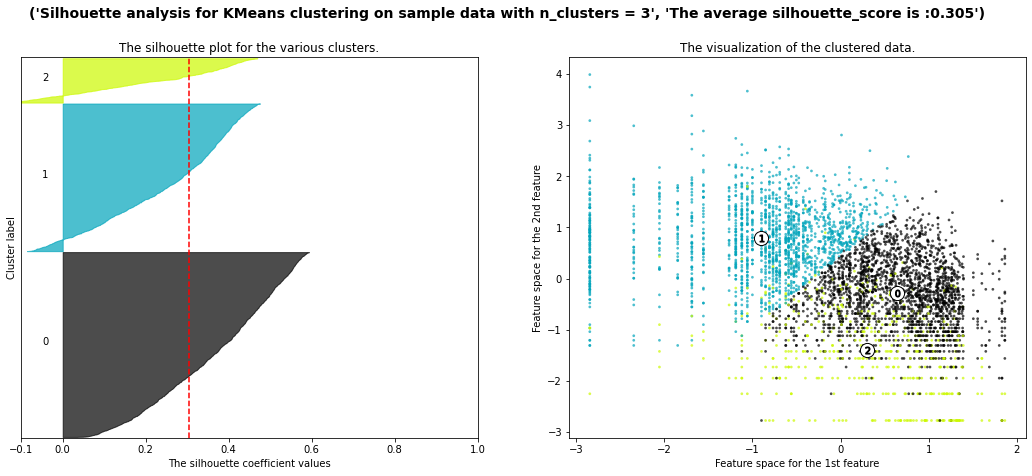

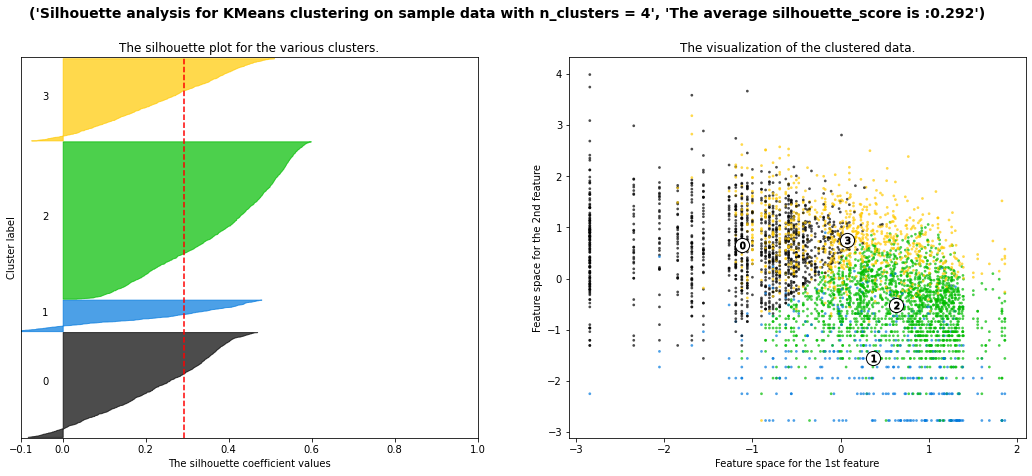

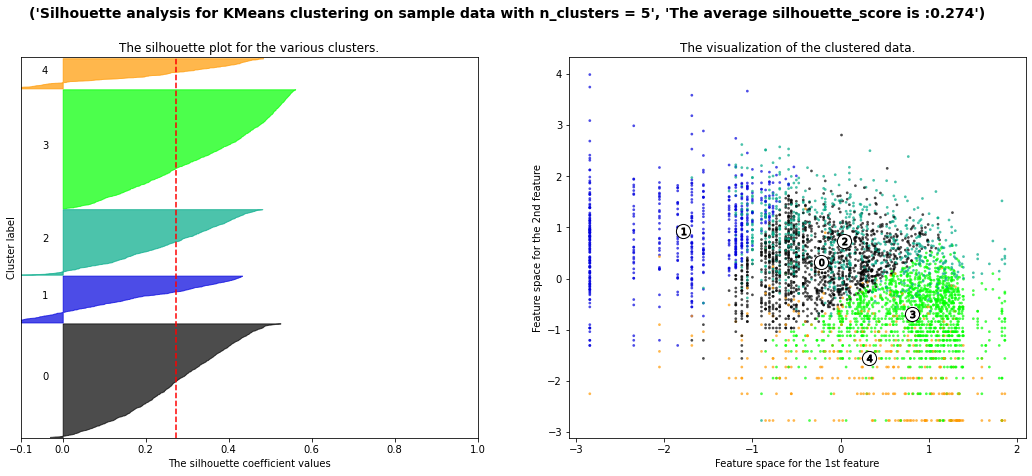

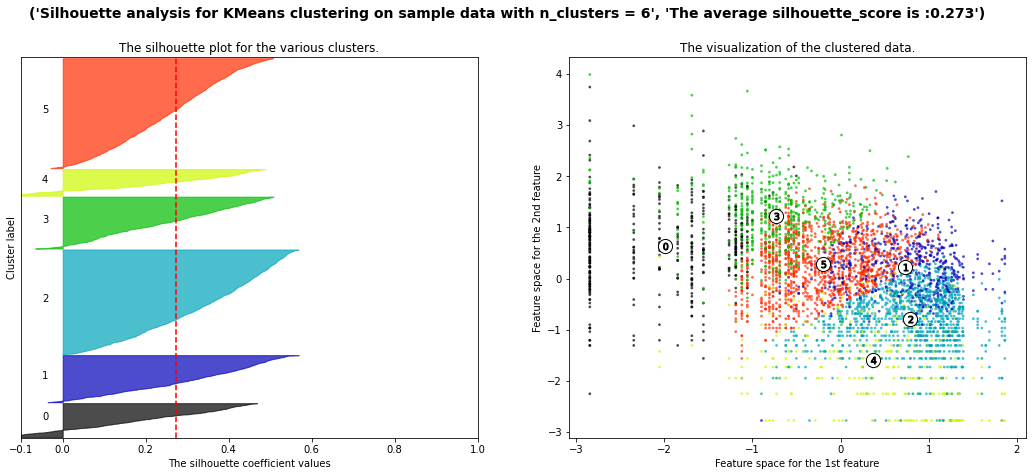

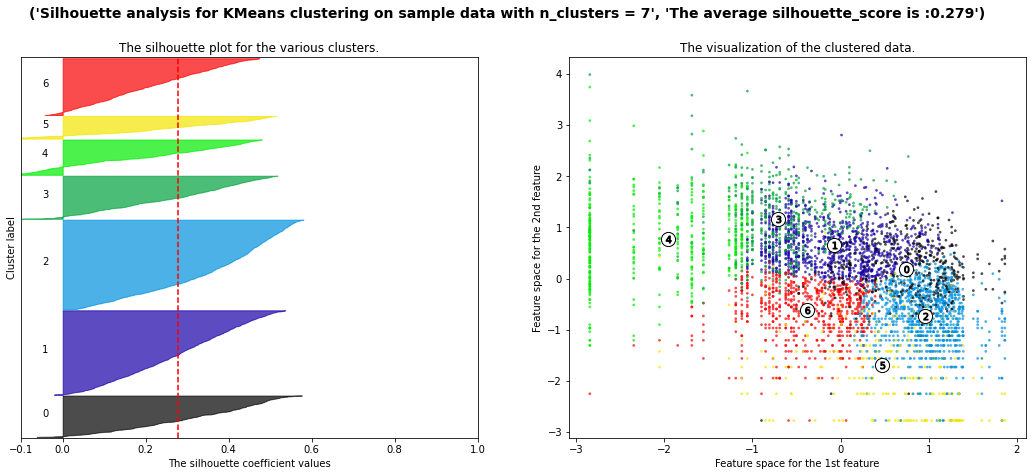

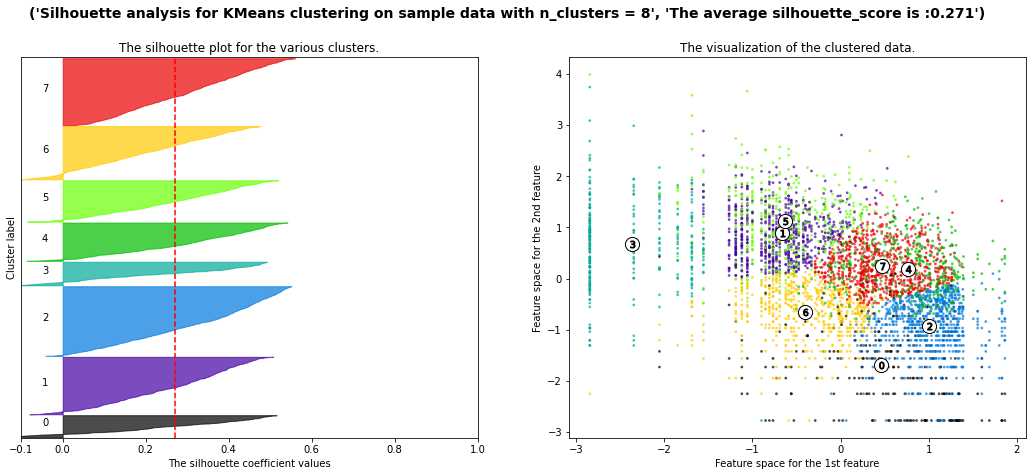

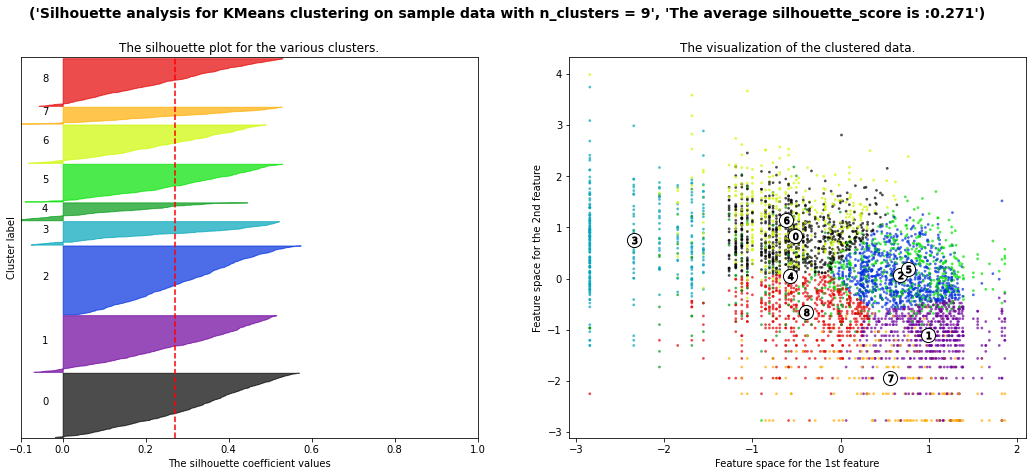

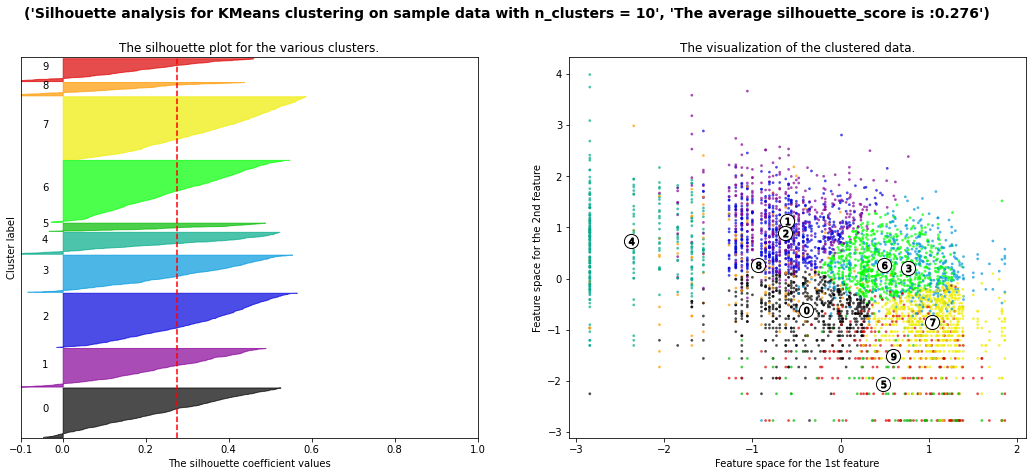

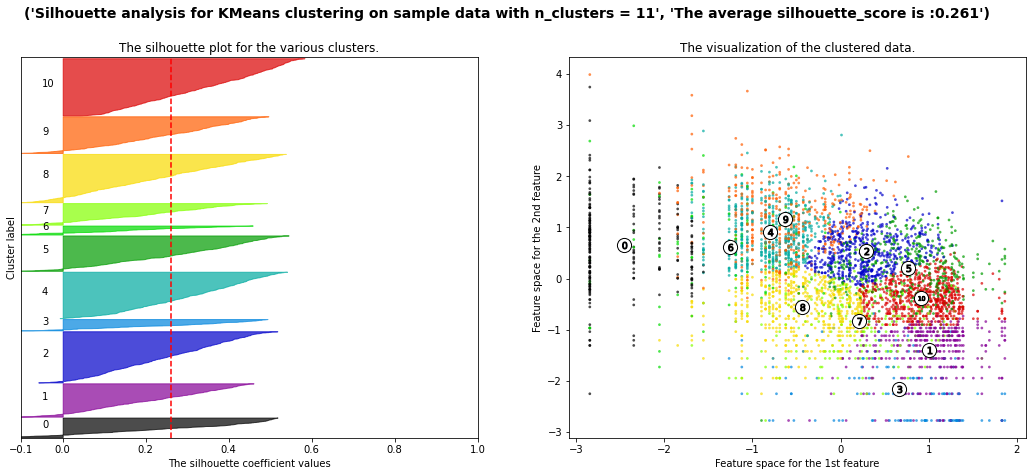

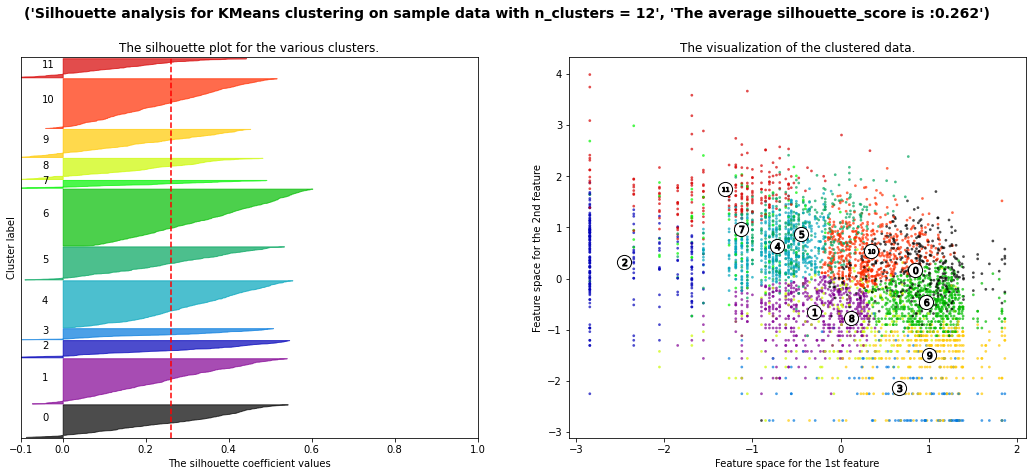

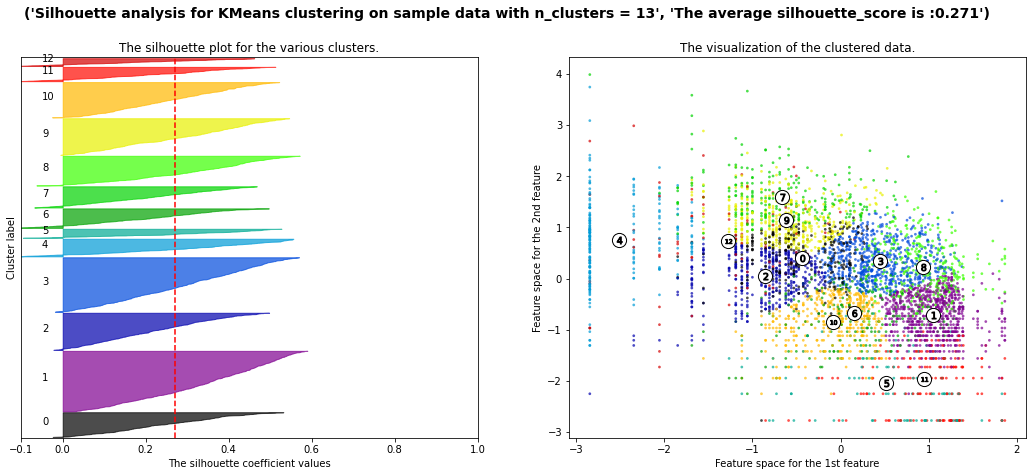

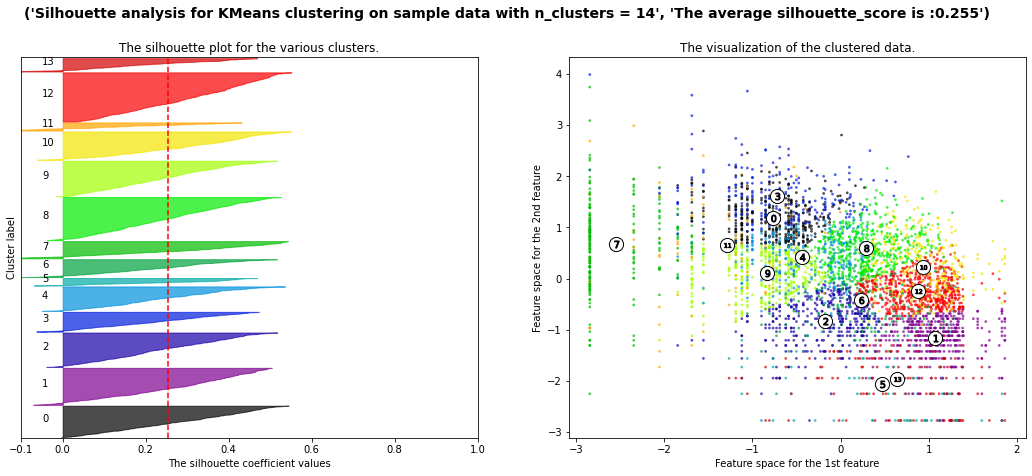

In [49]:
for n_clusters in range(2,15):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters,"The average silhouette_score is :%g"%round(silhouette_avg,3)),
                 fontsize=14, fontweight='bold')

plt.show()

* silhouette method suggest 2 followed by 3 as optimum K values.

In [50]:
#Fitting K-Mean model
KMean_clust_2 = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust_2.fit(X)
KMean_clust_3 = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust_3.fit(X)
#Find the clusters for the observation given in the dataset
rfm_df_1['K_mean_Cluster_2'] = KMean_clust_2.labels_
rfm_df_1['K_mean_Cluster_3'] = KMean_clust_3.labels_
rfm_df_1.head()

,level_0,index,CustomerID,Recency,Frequency,Monetary,Total_amount,R,F,M,RFM_Class,RFM_Score,Customer_grade,valuable or not,Recency_log,Monetary_log,Frequency_log,K_mean_Cluster_2,K_mean_Cluster_3
1,1,1,12347.0,40,182,23.681319,4310.00,4,5,4,454,26,Loyal Customers,NA,3.688879,3.164686,5.204007,0,2
2,2,2,12348.0,76,31,57.975484,1797.24,3,3,5,335,20,Potential Loyalist,NA,4.330733,4.060020,3.433987,1,1
3,3,3,12349.0,19,73,24.076027,1757.55,4,4,4,444,24,Loyal Customers,NA,2.944439,3.181217,4.290459,0,2
4,4,4,12350.0,311,17,19.670588,334.40,1,2,4,124,11,At Risk,NA,5.739793,2.979125,2.833213,1,0
5,5,5,12352.0,73,85,29.482824,2506.04,3,4,5,345,22,Potential Loyalist,NA,4.290459,3.383808,4.442651,0,0


In [51]:
#plotting agglomerative cluster
Kmeans_Cluster = px.scatter_3d(rfm_df_1, 
                    x = 'Recency_log', 
                    y = 'Frequency_log', 
                    z = 'Monetary_log',
                    hover_data=['K_mean_Cluster_3'],
                    title='Segmentation using DBscan_Clusters',
                    color = 'K_mean_Cluster_3')

Kmeans_Cluster.show()

In [52]:
temp_df=rfm_df_1.groupby(['valuable or not','K_mean_Cluster_2'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})

for x in ['valuable','May be valuable','invaluable']:
    target_type_piechart=px.pie(temp_df[temp_df['valuable or not']==x], 
                                 values='No. of customers',
                                 names='K_mean_Cluster_2',
                                 title=x)
    target_type_piechart.show()


In [53]:

temp_df=rfm_df_1.groupby(['Customer_grade','K_mean_Cluster_3'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})

for x in ['Lost','Hibernating','Can’t Lose Them','At Risk','About To Sleep','Customers Needing Attention','Promising','Recent Customers', 'Potential Loyalist', 'Loyal Customers', 'Champions']:
    target_type_piechart=px.pie(temp_df[temp_df['Customer_grade']==x], 
                                 values='No. of customers',
                                 names='K_mean_Cluster_3',
                                 title=x)
    target_type_piechart.show()


In [54]:
temp_df=rfm_df_1.groupby(['K_mean_Cluster_3','RFM_Class'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
treemap_country_wise=px.treemap(data_frame=temp_df,
                     values='No. of customers',
                     path=['K_mean_Cluster_3','RFM_Class'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on K_mean_Cluster_3 & RFM_Class in terms of number of customers')
treemap_country_wise.show()

In [55]:
rfm_df_1.groupby(['K_mean_Cluster_3','RFM_Class'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})

,K_mean_Cluster_3,RFM_Class,No. of customers
0,0,111,8
1,0,112,79
2,0,113,55
3,0,114,69
4,0,115,16
...,...,...,...
177,2,551,122
178,2,552,68
179,2,553,65
180,2,554,64


## Hierarchical clustering

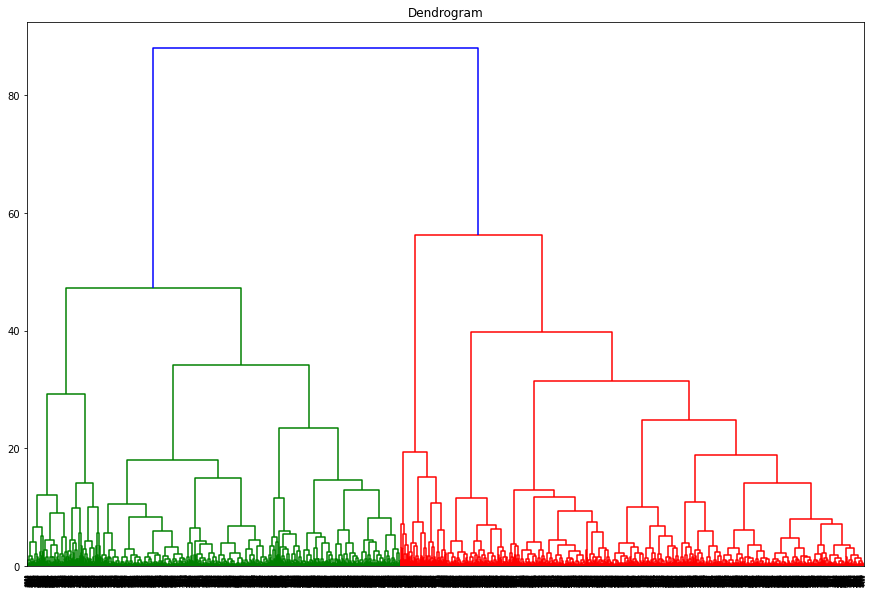

In [ ]:
#plotting dendogram to determine number of clusters.
rcParams['figure.figsize'] = 15, 10
# Using the dendogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [ ]:
# Fitting hierarchical clustering to scaled dataset
ag = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = ag.fit_predict(X)

In [ ]:
#creating agglomerative cluster columns
rfm_df_1['Agglomerative_Clusters'] =y_hc
rfm_df_1.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Class,RFM_Score,Customer_grade,Loyal_or_not,Recency_log,Monetary_log,Frequency_log,K_mean_Cluster_2,K_mean_Cluster_3,Agglomerative_Clusters
1,12347.0,40,182,23.681319,4,5,4,454,26,A+,Loyals,3.688879,3.164686,5.204007,1,0,1
2,12348.0,76,31,57.975484,3,3,5,335,20,B+,NA,4.330733,4.060020,3.433987,0,2,0
3,12349.0,19,73,24.076027,4,4,4,444,24,A,May be loyals,2.944439,3.181217,4.290459,1,0,1
4,12350.0,311,17,19.670588,1,2,4,124,11,C,disLoyals,5.739793,2.979125,2.833213,0,1,0
5,12352.0,73,85,29.482824,3,4,5,345,22,A,May be loyals,4.290459,3.383808,4.442651,1,1,0


In [ ]:

temp_df=rfm_df_1.groupby(['Agglomerative_Clusters','RFM_Class'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
treemap_country_wise=px.treemap(data_frame=temp_df,
                     values='No. of customers',
                     path=['Agglomerative_Clusters','RFM_Class'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on Agglomerative_Clusters & RFM_Class in terms of number of customers')
treemap_country_wise.show()

temp_df=rfm_df_1.groupby(['Agglomerative_Clusters','valuable or not'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
treemap_country_wise=px.treemap(data_frame=temp_df,
                     values='No. of customers',
                     path=['Agglomerative_Clusters','valuable or not'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on Agglomerative_Clusters & Customer_grade in terms of number of customers')
treemap_country_wise.show()


temp_df=rfm_df_1.groupby(['Agglomerative_Clusters','RFM_Score'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
treemap_country_wise=px.treemap(data_frame=temp_df,
                     values='No. of customers',
                     path=['Agglomerative_Clusters','RFM_Score'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on Agglomerative_Clusters & Customer_grade in terms of number of customers')
treemap_country_wise.show()

In [ ]:
temp_df=rfm_df_1.groupby(['valuable or not','Agglomerative_Clusters'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})

for x in ['Loyals','May be loyals','disLoyals']:
    target_type_piechart=px.pie(temp_df[temp_df['valuable or not']==x], 
                                 values='No. of customers',
                                 names='Agglomerative_Clusters',
                                 title='Custmer grade percentage distribution')
    target_type_piechart.show()


In [ ]:
rfm_df_1.groupby('Agglomerative_Clusters')['RFM_Score'].mean()

Agglomerative_Clusters
0    13.889537
1    23.139835
Name: RFM_Score, dtype: float64

## DB scan

In [ ]:
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)

DBSCAN_Cluster = px.scatter_3d(rfm_df_1, 
                    x = 'R', 
                    y = 'F', 
                    z = 'M',
                    hover_data=[y_pred],
                    title='Segmentation using DBscan_Clusters',
                    color = y_pred)

DBSCAN_Cluster.show()

In [ ]:
#creating DBscan columns
rfm_df_1['DBscan_Clusters'] =y_pred
rfm_df_1.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Class,RFM_Score,Customer_grade,Loyal_or_not,Recency_log,Monetary_log,Frequency_log,K_mean_Cluster_2,K_mean_Cluster_3,Agglomerative_Clusters,DBscan_Clusters
1,12347.0,40,182,23.681319,4,5,4,454,26,A+,Loyals,3.688879,3.164686,5.204007,1,0,1,0
2,12348.0,76,31,57.975484,3,3,5,335,20,B+,NA,4.330733,4.060020,3.433987,0,2,0,0
3,12349.0,19,73,24.076027,4,4,4,444,24,A,May be loyals,2.944439,3.181217,4.290459,1,0,1,0
4,12350.0,311,17,19.670588,1,2,4,124,11,C,disLoyals,5.739793,2.979125,2.833213,0,1,0,0
5,12352.0,73,85,29.482824,3,4,5,345,22,A,May be loyals,4.290459,3.383808,4.442651,1,1,0,0


In [ ]:
#plotting agglomerative cluster
Agglomerative_Cluster = px.scatter_3d(rfm_df_1, 
                    x = 'R', 
                    y = 'F', 
                    z = 'M',
                    hover_data=['Agglomerative_Clusters'],
                    title='Segmentation using DBscan_Clusters',
                    color = 'Agglomerative_Clusters')

Agglomerative_Cluster.show()

In [ ]:

temp_df=rfm_df_1.groupby(['DBscan_Clusters','RFM_Class'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
treemap_country_wise=px.treemap(data_frame=temp_df,
                     values='No. of customers',
                     path=['DBscan_Clusters','RFM_Class'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on DBscan_Clusters & RFM_Class in terms of number of customers')
treemap_country_wise.show()

temp_df=rfm_df_1.groupby(['DBscan_Clusters','Loyal_or_not'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
treemap_country_wise=px.treemap(data_frame=temp_df,
                     values='No. of customers',
                     path=['DBscan_Clusters','Loyal_or_not'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on DBscan_Clusters & Customer_grade in terms of number of customers')
treemap_country_wise.show()

temp_df=rfm_df_1.groupby(['DBscan_Clusters','RFM_Score'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
treemap_country_wise=px.treemap(data_frame=temp_df,
                     values='No. of customers',
                     path=['DBscan_Clusters','RFM_Score'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on DBscan_Clusters & Customer_grade in terms of number of customers')
treemap_country_wise.show()

In [ ]:
temp_df=rfm_df_1.groupby(['valuable or not','DBscan_Clusters'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})

for x in ['Loyals','May be loyals','disLoyals']:
    target_type_piechart=px.pie(temp_df[temp_df['valuable or not']==x], 
                                 values='No. of customers',
                                 names='DBscan_Clusters',
                                 title='Custmer grade percentage distribution')
    target_type_piechart.show()